In [1]:
import numpy as np
import math
class perceptron:
    def __init__(self, weights:list, bias=0, output:bool=False) -> None:
        self.bias = bias
        self.weights = weights
        self.output = output
        self.activity = 0
        self.activation = 0
        self.d_weights = weights.copy() # shouldn't use before it gets set
        self.d_bias = 0
        self.delta = 0

    def forward(self, x):
        self.calculate_activity(x)
        return self.calculate_activation()

    def calculate_activity(self, inputs:list):
        # A_j = sum(w_ij * x_i) + bias
        total = self.bias
        for x in range(len(inputs)):
            total += inputs[x] * self.weights[x]
        self.activity = total
        return total
    
    def calculate_activation(self):
        # y_j = f(A_j) -- using sigmoid
        self.activation = 1 / (1 + math.exp(self.activity * -1))
        return self.activation

    def calculate_delta_w(self, x, eta, expected=None, dk_w=None):
        # delta_w = eta * (d_k * x_j)
        # d_k = e_k (1-y)y
        if(self.output):
            self.delta = (expected - self.activation) * (1-self.activation) * self.activation
        else:
            self.delta = (1 - self.activation) * self.activation * (dk_w)
        for i in range(len(x)):
            self.d_weights[i] = eta * self.delta * x[i]
        self.d_bias = eta * self.delta
        return self.delta, self.d_weights

    def calculate_previous_d(self):
        prevs = []
        for weight in self.weights:
            prevs.append(weight*self.delta)
        return prevs

    def update_weights(self, bias=True):
        for i in range(len(self.weights)):
            self.weights[i] = self.weights[i] + self.d_weights[i]
        if bias: self.bias = self.bias + self.d_bias
        return self.weights
    
    def compute_error(self, expected):
        e = ((expected - self.activation) ** 2) / 2
        return e
    
    def get_weights(self):
        return self.weights, self.bias

class layer:
    pass

   Data item   LAC   SOW  TACA
0          1  0.90  0.87     1
2          3  1.31  0.75     1
4          5  2.48  1.14     0
6          7  0.41  1.87     0
8          9  2.45  0.52     0
   Data item   LAC   SOW  TACA
1          2  1.81  1.02     0
3          4  2.36  1.60     0
5          6  2.17  2.08     1
7          8  2.85  2.91     1
9         10  1.05  1.93     0


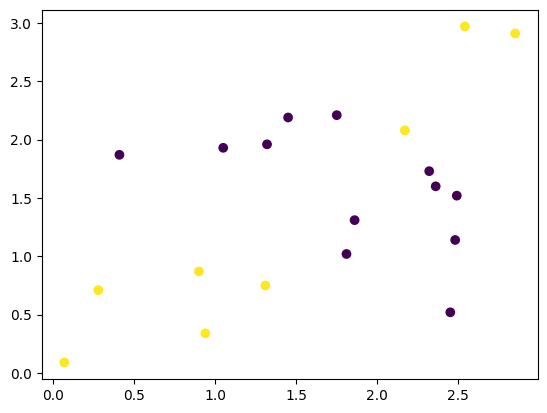

In [2]:
import pandas as pd
from random import random
import matplotlib.pyplot as plt

# this makes is so even => odd and odd => even
data = pd.read_csv("data.csv")
training_data = data.iloc[[x for x in range(0,19,2)]]   # items 1,3,5,...,19
test_data = data.iloc[[x for x in range(1,20,2)]]       # items 2,4,6,...,20
plt.scatter(x=data["LAC"], y=data["SOW"], c=data["TACA"])
print(training_data.head())
print(test_data.head())

Text(0.5, 1.0, 'Training Data')

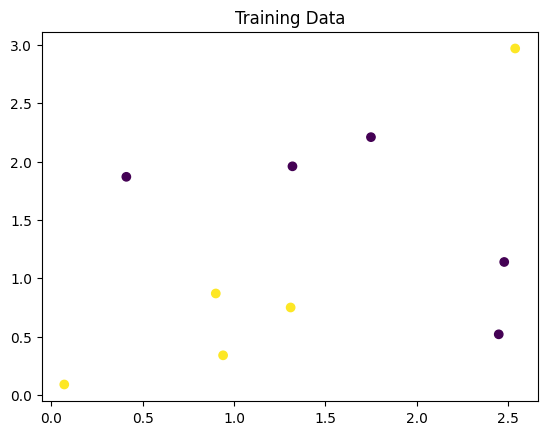

In [3]:
plt.scatter(x=training_data["LAC"], y=training_data["SOW"], c=training_data["TACA"])
plt.title("Training Data")

Text(0.5, 1.0, 'Testing Data')

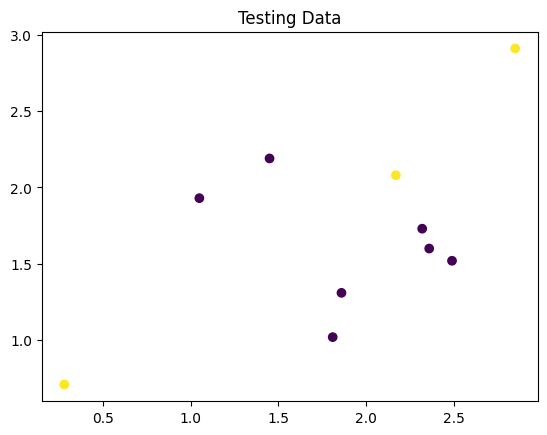

In [4]:
plt.scatter(x=test_data["LAC"], y=test_data["SOW"], c=test_data["TACA"])
plt.title("Testing Data")

### Single Perceptron Training

In [5]:
cycles = 30
eta = 1         # TODO: This is something we may choose to adjust
# initial weights
w0 = random()
w1 = random()
bias = random()
print(f"Initial weights: {w0}, {w1}")
print(f"Initial Bias: {bias}")
nodeP = perceptron([w0,w1], bias, output=True)

for i in range(cycles):
    for index in range(len(training_data)):
        entry = training_data.iloc[index]
        input = [entry["LAC"], entry["SOW"]]
        expected = entry["TACA"]
        nodeP.forward(input)
        nodeP.calculate_delta_w(input, eta, expected)
        nodeP.update_weights()

w, b = nodeP.get_weights()
print(f"Final weights: {w[0]}, {w[1]}")
print(f"Final bias: {b}")

Initial weights: 0.19175190294663924, 0.8907037357487027
Initial Bias: 0.353506288706976
Final weights: -1.3738459602389756, -2.1285667771514225
Final bias: 3.369906023266388


In [6]:
print("--Single On Test Data--")
for index in range(len(test_data)):
    entry = test_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    expected = entry["TACA"]
    output = nodeP.forward(input)
    print(f"Item {entry['Data item']}: Expected {expected}, Got {output}")
print("--Single On Training Data--")
for index in range(len(training_data)):
    entry = training_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    expected = entry["TACA"]
    output = nodeP.forward(input)
    print(f"Item {entry['Data item']}: Expected {expected}, Got {output}")

--Single On Test Data--
Item 2.0: Expected 0.0, Got 0.2162096089235664
Item 4.0: Expected 0.0, Got 0.03633097258626706
Item 6.0: Expected 1.0, Got 0.01731426557844632
Item 8.0: Expected 1.0, Got 0.0011816227110950464
Item 10.0: Expected 0.0, Got 0.10149104407984325
Item 12.0: Expected 0.0, Got 0.02931686528022613
Item 14.0: Expected 0.0, Got 0.12197382413072229
Item 16.0: Expected 0.0, Got 0.03613351830653269
Item 18.0: Expected 1.0, Got 0.8136565304103761
Item 20.0: Expected 0.0, Got 0.03604098833653692
--Single On Training Data--
Item 1.0: Expected 1.0, Got 0.5699363735284673
Item 3.0: Expected 1.0, Got 0.49343606024056746
Item 5.0: Expected 0.0, Got 0.07843535934841799
Item 7.0: Expected 0.0, Got 0.236170482179072
Item 9.0: Expected 0.0, Got 0.24920228530616656
Item 11.0: Expected 1.0, Got 0.0015914674258399359
Item 13.0: Expected 1.0, Got 0.9561510779525012
Item 15.0: Expected 0.0, Got 0.0681435971332454
Item 17.0: Expected 1.0, Got 0.7949096939793436
Item 19.0: Expected 0.0, Got 0

### 3 Node Network Training

In [7]:
cycles = 30
eta = 1
node1 = perceptron([random(),random()], bias=random())
node2 = perceptron([random(),random()], bias=random())
node3 = perceptron([random(),random()], bias=random(), output=True)
w, b = node1.get_weights()
print(f"Initial Weights Node 1: w0={w[0]}, w1={w[1]}, bias={b}")
w, b = node2.get_weights()
print(f"Initial Weights Node 2: w0={w[0]}, w1={w[1]}, bias={b}")
w, b = node3.get_weights()
print(f"Initial Weights Node 3: w0={w[0]}, w1={w[1]}, bias={b}")
for i in range(cycles):
    for index in range(len(training_data)):
        entry = training_data.iloc[index]
        input = [entry["LAC"], entry["SOW"]]
        expected = entry["TACA"]
        hidden_layer_out = []
        hidden_layer_out.append(node1.forward(input))
        hidden_layer_out.append(node2.forward(input))
        output = node3.forward(hidden_layer_out)

        node3.calculate_delta_w(hidden_layer_out, eta, expected=expected)
        prev_deltas = node3.calculate_previous_d()
        node1.calculate_delta_w(input, eta, dk_w=prev_deltas[0])
        node2.calculate_delta_w(input, eta, dk_w=prev_deltas[1])

        node1.update_weights()
        node2.update_weights()
        node3.update_weights()
w, b = node1.get_weights()
print(f"Final Weights Node 1: w0={w[0]}, w1={w[1]}, bias={b}")
w, b = node2.get_weights()
print(f"Final Weights Node 2: w0={w[0]}, w1={w[1]}, bias={b}")
w, b = node3.get_weights()
print(f"Final Weights Node 3: w0={w[0]}, w1={w[1]}, bias={b}")

Initial Weights Node 1: w0=0.44489401374854687, w1=0.26948744451293083, bias=0.10295789392212917
Initial Weights Node 2: w0=0.7385294246403395, w1=0.10866380123565966, bias=0.7695656318534146
Initial Weights Node 3: w0=0.8058188621832967, w1=0.17848545691101136, bias=0.2593617820606443
Final Weights Node 1: w0=-0.7039199332141376, w1=-1.2007050539940236, bias=0.6026480265871483
Final Weights Node 2: w0=0.6860805643448039, w1=0.5069597951630298, bias=0.2592534446042364
Final Weights Node 3: w0=1.8299413500966208, w1=-0.9596521565534578, bias=0.2722842608254296


In [8]:
print("--Network On Test Data--")
for index in range(len(test_data)):
    entry = test_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    expected = entry["TACA"]
    hidden_layer_out = []
    hidden_layer_out.append(node1.forward(input))
    hidden_layer_out.append(node2.forward(input))
    output = node3.forward(hidden_layer_out)
    print(f"Item {entry['Data item']}: Expected {expected}, Got {output}")
print("--Network On Training Data--")
for index in range(len(training_data)):
    entry = training_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    expected = entry["TACA"]
    hidden_layer_out = []
    hidden_layer_out.append(node1.forward(input))
    hidden_layer_out.append(node2.forward(input))
    output = node3.forward(hidden_layer_out)
    print(f"Item {entry['Data item']}: Expected {expected}, Got {output}")

--Network On Test Data--
Item 2.0: Expected 0.0, Got 0.4168044252157703
Item 4.0: Expected 0.0, Got 0.3686849265753088
Item 6.0: Expected 1.0, Got 0.3601640697975998
Item 8.0: Expected 1.0, Got 0.3428937929920683
Item 10.0: Expected 0.0, Got 0.3956016868409149
Item 12.0: Expected 0.0, Got 0.3658192642136468
Item 14.0: Expected 0.0, Got 0.3961040636440755
Item 16.0: Expected 0.0, Got 0.37239319561539486
Item 18.0: Expected 1.0, Got 0.5797310397065771
Item 20.0: Expected 0.0, Got 0.3681410635272549
--Network On Training Data--
Item 1.0: Expected 1.0, Got 0.49519074658668505
Item 3.0: Expected 1.0, Got 0.47487009617527887
Item 5.0: Expected 0.0, Got 0.38229238863645865
Item 7.0: Expected 0.0, Got 0.43070576997350596
Item 9.0: Expected 0.0, Got 0.42062727240307696
Item 11.0: Expected 1.0, Got 0.3443948699516643
Item 13.0: Expected 1.0, Got 0.6950957734542417
Item 15.0: Expected 0.0, Got 0.38447860821846636
Item 17.0: Expected 1.0, Got 0.5650159472042252
Item 19.0: Expected 0.0, Got 0.36502

### Metrics

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

preds = []
exps = []
for index in range(len(test_data)):
    entry = test_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    exps.append(entry["TACA"])
    preds.append(nodeP.forward(input))

tns = []
fps = []
fns = []
tps = []
thresholds = np.arange(0,1,.01)
for t in thresholds:
    thresh_pred = []
    for x in preds:
        if x > t:
            thresh_pred.append(1)
        else:
            thresh_pred.append(0)
    tn, fp, fn, tp = confusion_matrix(exps, thresh_pred).ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)

In [10]:
# for the 3 node network:
preds = []
exps = []
for index in range(len(test_data)):
    entry = test_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    exps.append(entry["TACA"])
    hidden_layer_out = []
    hidden_layer_out.append(node1.forward(input))
    hidden_layer_out.append(node2.forward(input))
    output = node3.forward(hidden_layer_out)
    preds.append(output)

tns3 = []
fps3 = []
fns3 = []
tps3 = []
for t in thresholds:
    thresh_pred = []
    for x in preds:
        if x > t:
            thresh_pred.append(1)
        else:
            thresh_pred.append(0)
    tn, fp, fn, tp = confusion_matrix(exps, thresh_pred).ravel()
    tns3.append(tn)
    fps3.append(fp)
    fns3.append(fn)
    tps3.append(tp)

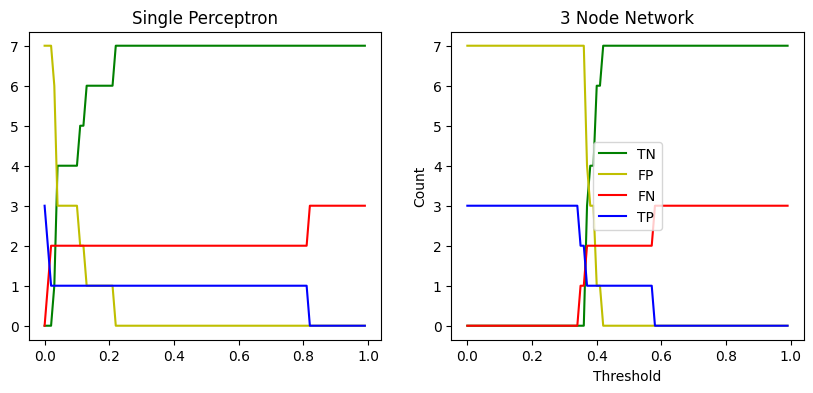

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.plot(thresholds, tns, "g", label="TN")
ax1.plot(thresholds, fps, "y", label="FP")
ax1.plot(thresholds, fns, "r", label="FN")
ax1.plot(thresholds, tps, "b", label="TP")
ax1.set_title("Single Perceptron")
ax2.plot(thresholds, tns3, "g", label="TN")
ax2.plot(thresholds, fps3, "y", label="FP")
ax2.plot(thresholds, fns3, "r", label="FN")
ax2.plot(thresholds, tps3, "b", label="TP")
ax2.set_title("3 Node Network")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.legend()

In [12]:
tns = np.array(tns)
fps = np.array(fps)
fns = np.array(fns)
tps = np.array(tps)
precision = tps / (tps + fps +.0001)
recall = tps / (tps + fns + .0001)
sensitivity = tps / (tps + fns + .0001)
specificity = tns / (tns + fps + .0001)
f1_score = tps / (tps + ((fps + fns) / 2))

tns3 = np.array(tns3)
fps3 = np.array(fps3)
fns3 = np.array(fns3)
tps3 = np.array(tps3)
precision3 = tps3 / (tps3 + fps3 +.0001)
recall3 = tps3 / (tps3 + fns3 + .0001)
sensitivity3 = tps3 / (tps3 + fns3 + .0001)
specificity3 = tns3 / (tns3 + fps3 + .0001)
f1_score3 = tps3 / (tps3 + ((fps3 + fns3) / 2))

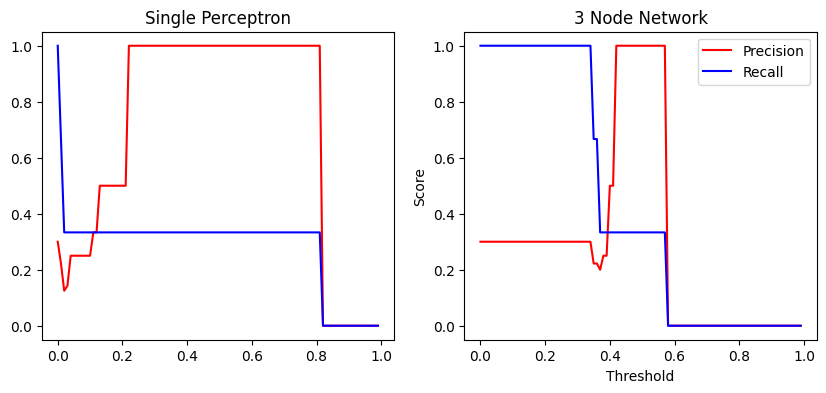

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.plot(thresholds, precision, "r", label="Precision")
ax1.plot(thresholds, recall, "b", label="Recall")
ax1.set_title("Single Perceptron")
ax2.plot(thresholds, precision3, "r", label="Precision")
ax2.plot(thresholds, recall3, "b", label="Recall")
ax2.set_title("3 Node Network")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()

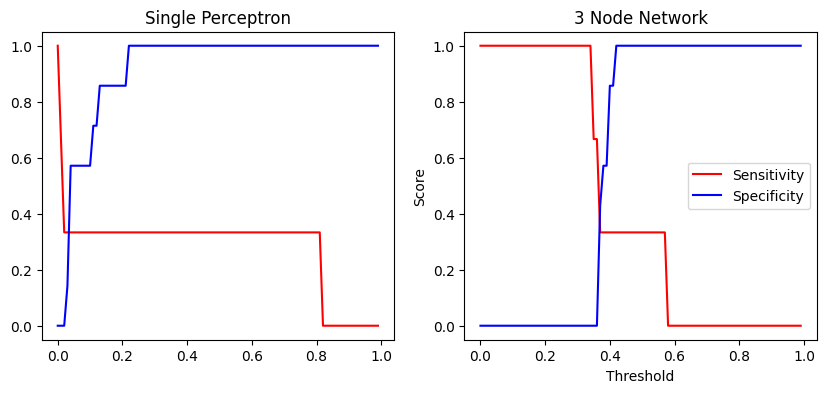

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.plot(thresholds, sensitivity, "r", label="Sensitivity")
ax1.plot(thresholds, specificity, "b", label="Specificity")
ax1.set_title("Single Perceptron")
ax2.plot(thresholds, sensitivity3, "r", label="Sensitivity")
ax2.plot(thresholds, specificity3, "b", label="Specificity")
ax2.set_title("3 Node Network")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()

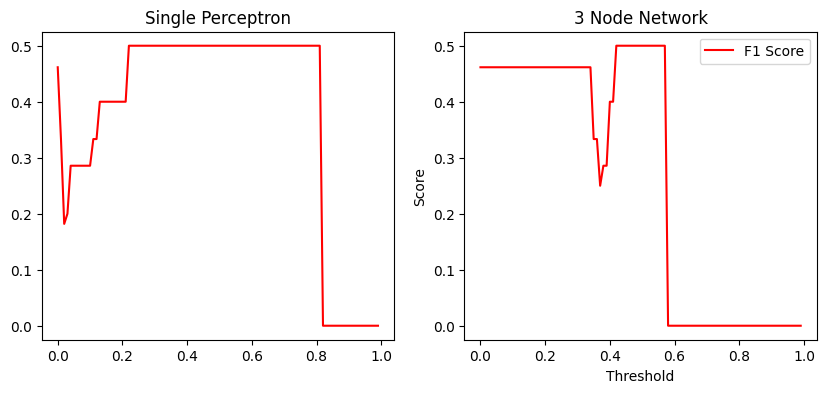

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.plot(thresholds, f1_score, "r", label="F1 Score")
ax1.set_title("Single Perceptron")
ax2.plot(thresholds, f1_score3, "r", label="F1 Score")
ax2.set_title("3 Node Network")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()